#### Advertising Sales Channel Prediction

#### Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [164]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [165]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


- no null values in the dataframe

In [13]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


- TV -> min(0.70) -> max(296.4) -> mean (147.04)
- radio -> min(0) -> max(49.6) -> mean(23.26)
- newspaper -> min(0.30) -> max(114) -> mean(30.55)
- sales -> min(1.60) -> max(27) -> mean(14)

In [14]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

- keeping the threshold at +/- 0.5 

        - TV, radio and sales skewness is good
        - newpaper column is skewed

In [15]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


##### adding a column that says sales = high or low based on the number of sales 

        - if sales is less than the mean(14) then sales=bad;
        - else: sales=good

♣ using this for visualization only 

In [152]:
df_new = df.copy()
result = []

for i in df_new['sales']:
    if i>=14.0:
        result.append('Good')
    elif i<14.0:
        result.append('Bad')
    else:
        result.append('NA')

df_new['result'] = result

In [167]:
df_new['result'].value_counts()

Bad     110
Good     90
Name: result, dtype: int64

#### Visualization 

<AxesSubplot:>

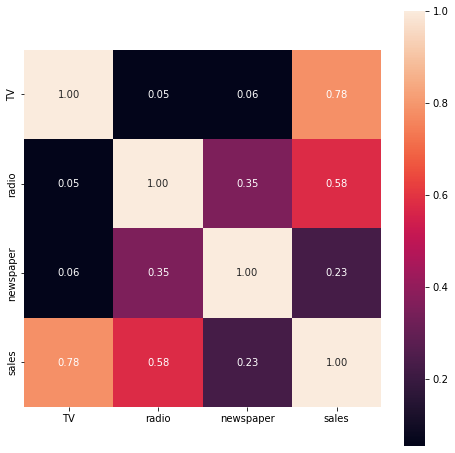

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),fmt='.2f',annot=True,square=True)

- according to df.corr() 

        - TV has high correlation with sales and then followed by radio

<AxesSubplot:xlabel='TV', ylabel='sales'>

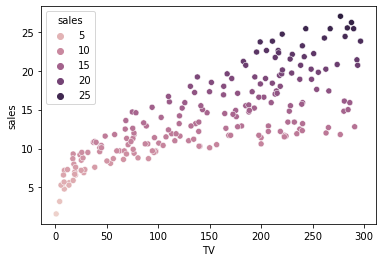

In [30]:
sns.scatterplot(x=df['TV'],y=df['sales'],hue=df['sales'])

<AxesSubplot:xlabel='radio', ylabel='sales'>

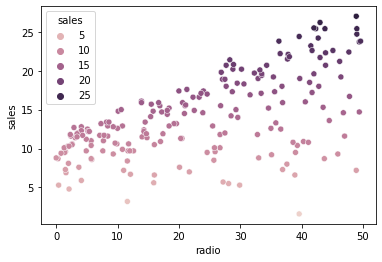

In [31]:
sns.scatterplot(x=df['radio'],y=df['sales'],hue=df['sales'])

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

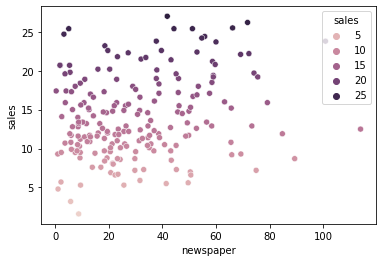

In [32]:
sns.scatterplot(x=df['newspaper'],y=df['sales'],hue=df['sales'])

the large number of ads in the newspaper channel is not needed to generate bigger sales

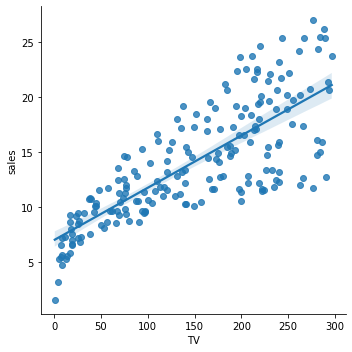

In [177]:
sns.lmplot(x='TV',y='sales',data=df)
plt.show() #this shows that there is a positive linear relationship b/w TV and sales

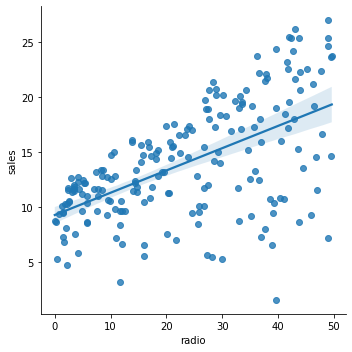

In [201]:
sns.lmplot(x='radio',y='sales',data=df)
plt.show() #this shows that there is a positive linear relationship b/w radio and sales

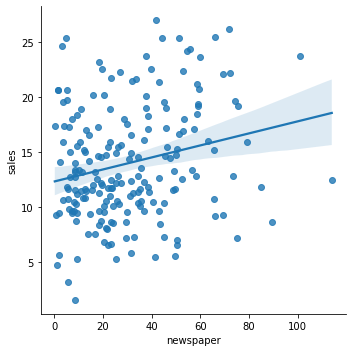

In [202]:
sns.lmplot(x='newspaper',y='sales',data=df)
plt.show() 
#this shows that there is a positive linear relationship b/w radio and sales
#also the data is more scattered in this one

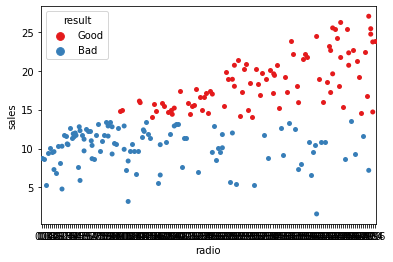

In [200]:
sns.swarmplot(x='radio',y='sales',data=df_new,hue='result',palette='Set1',orient='v')
plt.show()

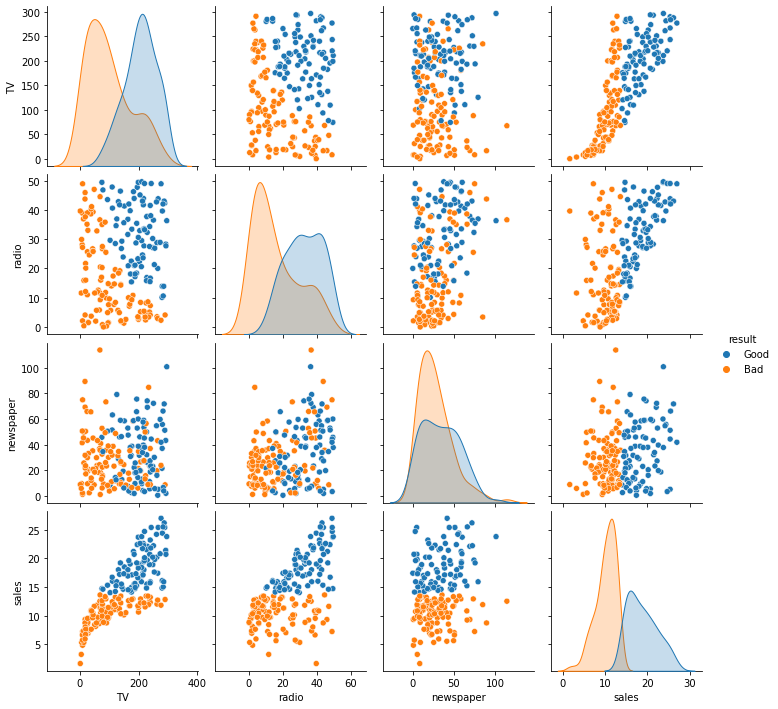

In [235]:
sns.pairplot(df_new,hue='result')
plt.show()

- according to the above plot, the best method to generate more sales is through the TV channel

#### outliers

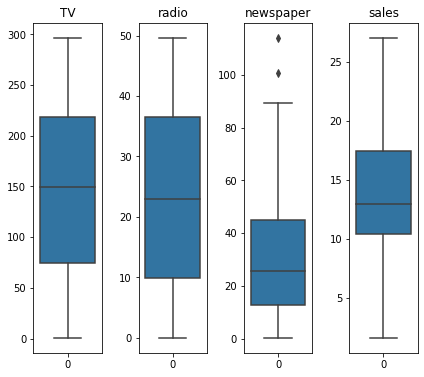

In [219]:
collist = df.columns.values
ncols = 4
nrows = 4
plt.figure(figsize=(6,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data=df[collist[i]],orient='v')
    plt.title(df.columns[i])
    plt.tight_layout()

- as expected, there are outliers in the 'newspaper' column

#### Removing outleirs using zscore method

In [228]:
from scipy.stats import zscore

z = np.abs(zscore(df))
z

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,1.197376,1.082808,0.669579,0.696046
2,1.516155,1.528463,1.783549,0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,0.841614,1.281802,0.215683
...,...,...,...,...
195,1.270941,1.321031,0.771217,1.234053
196,0.617035,1.240003,1.033598,0.830548
197,0.349810,0.942899,1.111852,0.234898
198,1.594565,1.265121,1.640850,2.205347


In [227]:
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [229]:
df_z = df[(z<3).all(axis=1)]
df_z.shape

(198, 4)

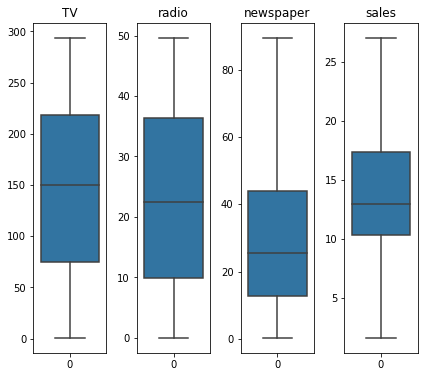

In [230]:
collist = df.columns.values
ncols = 4
nrows = 4
plt.figure(figsize=(6,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data=df_z[collist[i]],orient='v')
    plt.title(df.columns[i])
    plt.tight_layout()

- outleirs have been removed

#### Multicollinearity

In [248]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Variables'] = df.columns
vif['VIF Factor'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif

,Variables,VIF Factor
0,TV,23.198876
1,radio,12.570312
2,newspaper,3.153498
3,sales,55.303920


#### Seperating into X & Y

In [251]:
x = df.drop('sales',axis=1)
y = df['sales']

#### Removing skewness using power transform

In [246]:
skewness_before = []
for i in df.skew():
    skewness_before.append(i+1)
    
skewness_before

[0.9301466378672543, 1.094174631496644, 1.8947204074986175, 1.4075714250767126]

In [252]:
from sklearn.preprocessing import power_transform

x = power_transform(x,method='yeo-johnson')
x

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

In [256]:
x_skew = pd.DataFrame(x)
x_skew.skew()

0   -0.315199
1   -0.242968
2   -0.077942
dtype: float64

In [261]:
#checking the difference in skewness
skewness_difference = pd.DataFrame({'Column Name':['TV','Radio','Newspaper'],'Before':skewness_before[0:3],'After':x_skew.skew()})
skewness_difference

,Column Name,Before,After
0,TV,0.930147,-0.315199
1,Radio,1.094175,-0.242968
2,Newspaper,1.894720,-0.077942


- the skewness of all columns are below the threshold (+/- 0.5)

In [268]:
#checking multicollinearity as well.

vif_new = pd.DataFrame()
vif_new['Variables'] = df.columns[0:3]
vif_new['VIF Factor'] = [variance_inflation_factor(x_skew.values,i) for i in range(x_skew.shape[1])]
vif_new

,Variables,VIF Factor
0,TV,1.003112
1,radio,1.094332
2,newspaper,1.093766


- VIF is also not high after performing power transform

#### Train test split 

In [269]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#### Models

In [308]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [272]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_r2 = r2_score(y_test,lr_pred)
lr_mae = mean_absolute_error(y_test,lr_pred)
lr_mse = mean_squared_error(y_test,lr_pred)
lr_rmse = mean_squared_error(y_test,lr_pred,squared=False)

print ("Model Name:",lr)
print ("R2 Score:",round(lr_r2*100,2))
print ("MSE:",lr_mse)
print ("MAE:",lr_mae)
print ("RMSE:",lr_rmse)

Model Name: LinearRegression()
R2 Score: 90.88
MSE: 1.9687738747879482
MAE: 1.1421049881574192
RMSE: 1.4031300277550716


In [287]:
L = Lasso()
L.fit(x_train,y_train)
L_pred = L.predict(x_test)
L_r2 = r2_score(y_test,L_pred)
L_mae = mean_absolute_error(y_test,L_pred)
L_mse = mean_squared_error(y_test,L_pred)
L_rmse = mean_squared_error(y_test,L_pred,squared=False)

print ("Model Name:",L)
print ("R2 Score:",round(L_r2*100,2))
print ("Mean Squared Error:",L_mse)
print ("Mean Absolute Error:",L_mae)
print ("Root Mean Squared Error:",L_rmse)

Model Name: Lasso()
R2 Score: 84.75
Mean Squared Error: 3.2911572179798227
Mean Absolute Error: 1.3054648364497283
Root Mean Squared Error: 1.8141546841379934


In [277]:
R = Ridge()
R.fit(x_train,y_train)
R_pred = R.predict(x_test)
R_r2 = r2_score(y_test,R_pred)
R_mae = mean_absolute_error(y_test,R_pred)
R_mse = mean_squared_error(y_test,R_pred)
R_rmse = mean_squared_error(y_test,R_pred,squared=False)

print ("Model Name:",R)
print ("R2 Score:",round(R_r2*100,2))
print ("Mean Squared Error:",R_mse)
print ("Mean Absolute Error:",R_mae)
print ("Root Mean Squared Error:",R_rmse)

ModeR Name: Ridge()
R2 Score: 90.89
MSE: 1.9656244467156143
MAE: 1.138238230890425
RMSE: 1.4020072919623543


In [282]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
svr_para = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':['scale','auto'],'C':range(1,11)}
gs_svr = GridSearchCV(svr,svr_para,cv=3,scoring='accuracy')
gs_svr.fit(x_train,y_train)
gs_svr.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [285]:
svr = SVR(C=1,kernel='linear',gamma='scale')
svr.fit(x_train,y_train)
svr_pred = svr.predict(x_test)
svr_r2 = r2_score(y_test,svr_pred)
svr_mae = mean_absolute_error(y_test,svr_pred)
svr_mse = mean_squared_error(y_test,svr_pred)
svr_rmse = mean_squared_error(y_test,svr_pred,squared=False)
print ("r2 Score:",round(svr_r2*100,2),'%')
print ("Mean Absolute Error:",svr_mae)
print ("Mean Squared Error:",svr_mse)
print ("Root Mean Squared Error:",svr_rmse)

r2 Score: 90.59 %
Mean Absolute Error: 1.1602360817061315
Mean Squared Error: 2.031882287816208
Root Mean Squared Error: 1.4254410853543573


In [288]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor

rfr = RandomForestRegressor()
rfr_para = {'max_features':['sqrt','log2'],'random_state':range(1,101)}
gs_rfr = GridSearchCV(rfr,rfr_para,cv=3,scoring='accuracy')
gs_rfr.fit(x_train,y_train)
gs_rfr.best_params_

{'max_features': 'sqrt', 'random_state': 1}

In [289]:
rfr = RandomForestRegressor(random_state=1,max_features='sqrt')
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
rfr_r2 = r2_score(y_test,rfr_pred)
rfr_mae = mean_absolute_error(y_test,rfr_pred)
rfr_mse = mean_squared_error(y_test,rfr_pred)
rfr_rmse = mean_squared_error(y_test,rfr_pred,squared=False)
print ("r2 Score:",round(rfr_r2*100,2),'%')
print ("Mean Absolute Error:",rfr_mae)
print ("Mean Squared Error:",rfr_mse)
print ("Root Mean Squared Error:",rfr_rmse)

r2 Score: 94.06 %
Mean Absolute Error: 0.8750750000000009
Mean Squared Error: 1.2821287249999986
Root Mean Squared Error: 1.1323112315083688


In [294]:
ada = AdaBoostRegressor()
ada_para = {'loss':['linear','square','exponential'],'random_state':range(1,50)}
gs_ada = GridSearchCV(ada,ada_para,cv=3,scoring='accuracy')
gs_ada.fit(x_train,y_train)
gs_ada.best_params_

{'loss': 'linear', 'random_state': 1}

In [295]:
ada = AdaBoostRegressor(random_state=1,loss='linear')
ada.fit(x_train,y_train)
ada_pred = ada.predict(x_test)
ada_r2 = r2_score(y_test,ada_pred)
ada_mae = mean_absolute_error(y_test,ada_pred)
ada_mse = mean_squared_error(y_test,ada_pred)
ada_rmse = mean_squared_error(y_test,ada_pred,squared=False)
print ("r2 Score:",round(ada_r2*100,2),'%')
print ("Mean Absolute Error:",ada_mae)
print ("Mean Squared Error:",ada_mse)
print ("Root Mean Squared Error:",ada_rmse)

r2 Score: 95.4 %
Mean Absolute Error: 0.81503830880437
Mean Squared Error: 0.9938935248047092
Root Mean Squared Error: 0.9969420869863551


In [297]:
br = BaggingRegressor()
br_para = {'n_estimators':np.arange(100,500,50)}
gs_br = GridSearchCV(br,br_para,cv=7,scoring='accuracy')
gs_br.fit(x_train,y_train)
gs_br.best_params_

{'n_estimators': 100}

In [298]:
br = BaggingRegressor(n_estimators=100)
br.fit(x_train,y_train)
br_pred = br.predict(x_test)
br_r2 = r2_score(y_test,br_pred)
br_mae = mean_absolute_error(y_test,br_pred)
br_mse = mean_squared_error(y_test,br_pred)
br_rmse = mean_squared_error(y_test,br_pred,squared=False)
print ("r2 Score:",round(br_r2*100,2),'%')
print ("Mean Absolute Error:",br_mae)
print ("Mean Squared Error:",br_mse)
print ("Root Mean Squared Error:",br_rmse)

r2 Score: 97.95 %
Mean Absolute Error: 0.5482499999999998
Mean Squared Error: 0.44188594999999725
Root Mean Squared Error: 0.6647450263070775


In [301]:
gbr = GradientBoostingRegressor()
gbr_para = {'loss':['huber','quantile'],'n_estimators':range(50,250,50),
            'criterion':['friedman_mse','mse','squared_error']}
gs_gbr = GridSearchCV(gbr,gbr_para,cv=3,scoring='accuracy')
gs_gbr.fit(x_train,y_train)
gs_gbr.best_params_

{'criterion': 'friedman_mse', 'loss': 'huber', 'n_estimators': 50}

In [302]:
gbr = GradientBoostingRegressor(n_estimators=50,loss='huber',criterion='friedman_mse')
gbr.fit(x_train,y_train)
gbr_pred = gbr.predict(x_test)
gbr_r2 = r2_score(y_test,gbr_pred)
gbr_mae = mean_absolute_error(y_test,gbr_pred)
gbr_mse = mean_squared_error(y_test,gbr_pred)
gbr_rmse = mean_squared_error(y_test,gbr_pred,squared=False)
print ("r2 Score:",round(gbr_r2*100,2),'%')
print ("Mean Absolute Error:",gbr_mae)
print ("Mean Squared Error:",gbr_mse)
print ("Root Mean Squared Error:",gbr_rmse)

r2 Score: 97.86 %
Mean Absolute Error: 0.5445021255639512
Mean Squared Error: 0.4608643552168835
Root Mean Squared Error: 0.678869910378184


In [304]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr_para = {'algorithm':['auto','ball_tree','kd_tree','brute'],'n_neighbors':range(1,51),
            'weights':['uniform','distance']}
gs_knr = GridSearchCV(knr,knr_para,cv=3,scoring='accuracy')
gs_knr.fit(x_train,y_train)
gs_knr.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [305]:
knr = KNeighborsRegressor(n_neighbors=1,algorithm='auto',weights='uniform')
knr.fit(x_train,y_train)
knr_pred = knr.predict(x_test)
knr_r2 = r2_score(y_test,knr_pred)
knr_mae = mean_absolute_error(y_test,knr_pred)
knr_mse = mean_squared_error(y_test,knr_pred)
knr_rmse = mean_squared_error(y_test,knr_pred,squared=False)
print ("r2 Score:",round(knr_r2*100,2),'%')
print ("Mean Absolute Error:",knr_mae)
print ("Mean Squared Error:",knr_mse)
print ("Root Mean Squared Error:",knr_rmse)

r2 Score: 92.9 %
Mean Absolute Error: 1.02
Mean Squared Error: 1.533
Root Mean Squared Error: 1.2381437719424995


####  Comparing all the models

In [309]:
R2 ,MSE ,MAE ,RMSE ,CV ,accuracy ,model_name = [],[],[],[],[],[],[]

models = {'RandomForestRegression':rfr,'SupportVectorRegression':svr, 
          'ADABoostRegression':ada,'KNeighborsRegression':knr,
          'GradientBoostingRegression':gbr,'LinearRegression':lr,
          'Lasso':L,'Ridge':R}

for i in models.keys():
    model = models[i]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    test_score = model.score(x_test,y_test)
    cv_score = cross_val_score(models[i],x,y).mean()
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    R2_S = r2_score(y_test,y_pred)
    print('-'*50)
    print("Model:",i)
    model_name.append(i)
    print("Accuracy:",round(test_score*100,2))
    accuracy.append(round(test_score*100,2))
    print("R2 Score:",round(R2_S*100,2))
    R2.append(round(R2_S*100,2))
    print("CV Score:",round(cv_score*100,2))
    CV.append(round(cv_score*100,2))
    print("MAE:",mae)
    MAE.append(mae)
    print("MSE:",mse)
    MSE.append(mse)
    print("RMSE:",rmse)
    RMSE.append(rmse)

--------------------------------------------------
Model: RandomForestRegression
Accuracy: 94.06
R2 Score: 94.06
CV Score: 90.94
MAE: 0.8750750000000009
MSE: 1.2821287249999986
RMSE: 1.1323112315083688
--------------------------------------------------
Model: SupportVectorRegression
Accuracy: 90.59
R2 Score: 90.59
CV Score: 89.05
MAE: 1.1602360817061315
MSE: 2.031882287816208
RMSE: 1.4254410853543573
--------------------------------------------------
Model: ADABoostRegression
Accuracy: 95.4
R2 Score: 95.4
CV Score: 95.28
MAE: 0.81503830880437
MSE: 0.9938935248047092
RMSE: 0.9969420869863551
--------------------------------------------------
Model: KNeighborsRegression
Accuracy: 92.9
R2 Score: 92.9
CV Score: 92.18
MAE: 1.02
MSE: 1.533
RMSE: 1.2381437719424995
--------------------------------------------------
Model: GradientBoostingRegression
Accuracy: 97.89
R2 Score: 97.89
CV Score: 97.36
MAE: 0.5424385362209945
MSE: 0.4560722389899453
RMSE: 0.675331206882923
--------------------------

In [310]:
sales_df = pd.DataFrame({'Model':model_name,'Accuracy':accuracy,'CV Score':CV,'R2 Score':R2,'MSE':MSE,
                        'RMSE':RMSE,'MAE':MAE})
sales_df.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy,CV Score,R2 Score,MSE,RMSE,MAE
4,GradientBoostingRegression,97.89,97.36,97.89,0.456072,0.675331,0.542439
2,ADABoostRegression,95.40,95.28,95.40,0.993894,0.996942,0.815038
0,RandomForestRegression,94.06,90.94,94.06,1.282129,1.132311,0.875075
3,KNeighborsRegression,92.90,92.18,92.90,1.533000,1.238144,1.020000
7,Ridge,90.89,89.79,90.89,1.965624,1.402007,1.138238
5,LinearRegression,90.88,89.78,90.88,1.968774,1.403130,1.142105
1,SupportVectorRegression,90.59,89.05,90.59,2.031882,1.425441,1.160236
6,Lasso,84.75,82.71,84.75,3.291157,1.814155,1.305465


- the best model is GradientBoosting Regression with an accuracy score of 97.89%
- the worst performing model for this dataset is Lasso with an accuracy score of 84.75%

#### Saving the file 

In [311]:
import pickle

In [312]:
file = "Sales_Prediction_DataTrained"
pickle.dump(sales_df,open(file,'wb'))